In [136]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
#Importing Dataset
df = pd.read_csv('diabetes.csv')

In [138]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [139]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### As there aren't any missing values we need not to remove any values or impute the values







In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [141]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


OBSERVATIONS FROM ABOVE
1.Average glucose in the above dataset is 120.894531
Maximu glucose is 199
2.Average BloodPressure is 69.105469
and maximum is 122
3.Average Age is 33.240885
and maximum age is 81

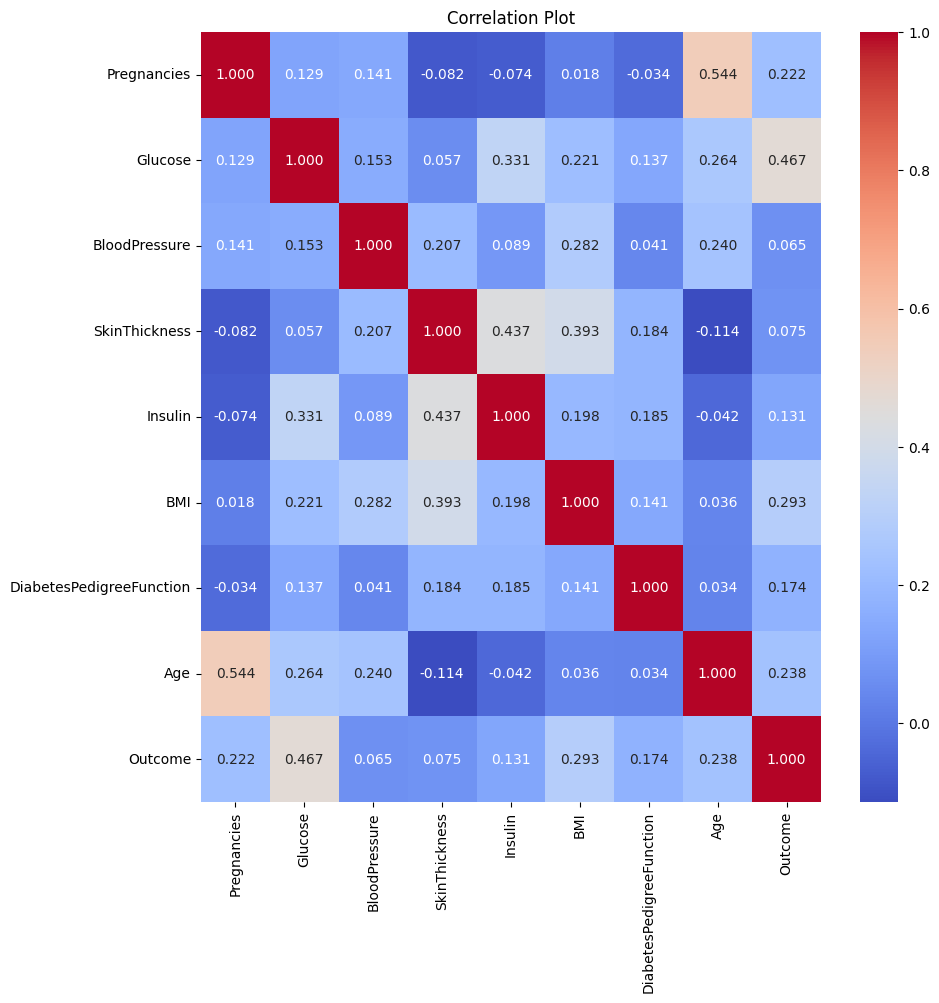

In [142]:
#Correlation plot of independent variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True ,fmt='.3f', cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

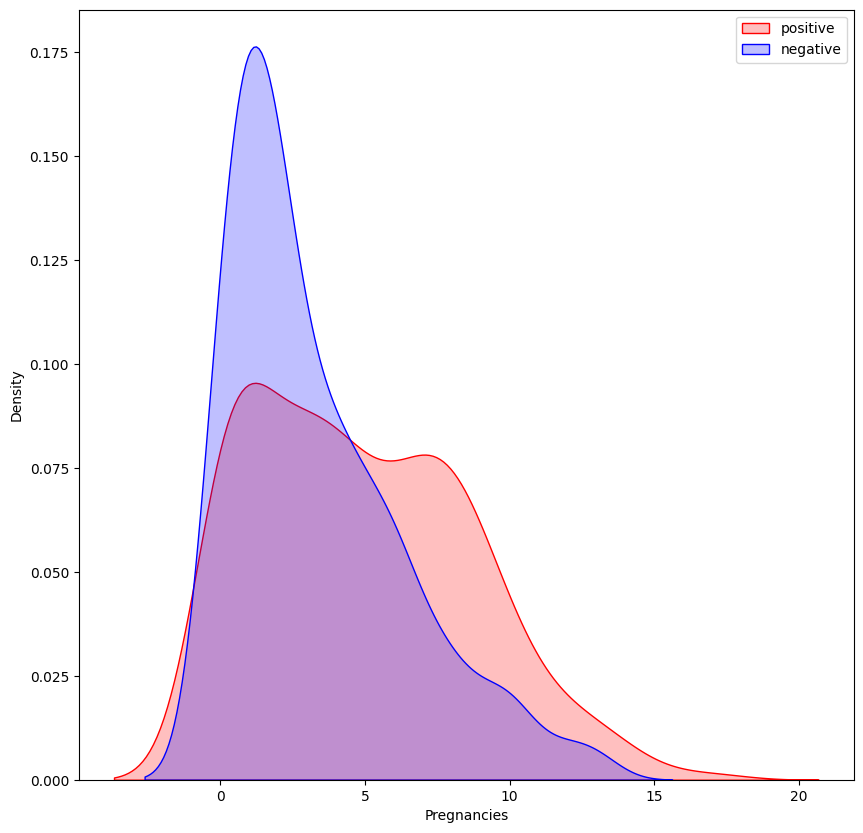

In [143]:
#Exploring the features
plt.figure(figsize=(10,10))
#Plotting density values for preganancy column
sns.kdeplot(df['Pregnancies'][df['Outcome']==1], color="red", fill=True, label='positive')
sns.kdeplot(df['Pregnancies'][df['Outcome']==0], color="blue", fill=True, label='negative')
plt.xlabel('Pregnancies')
plt.ylabel('Density')
plt.legend()
plt.show()

From the above Exploration we can conclude that the density of people are high where they aren't diabetic and had pregnancies and the range of them is high in between 0-5 pregnancies

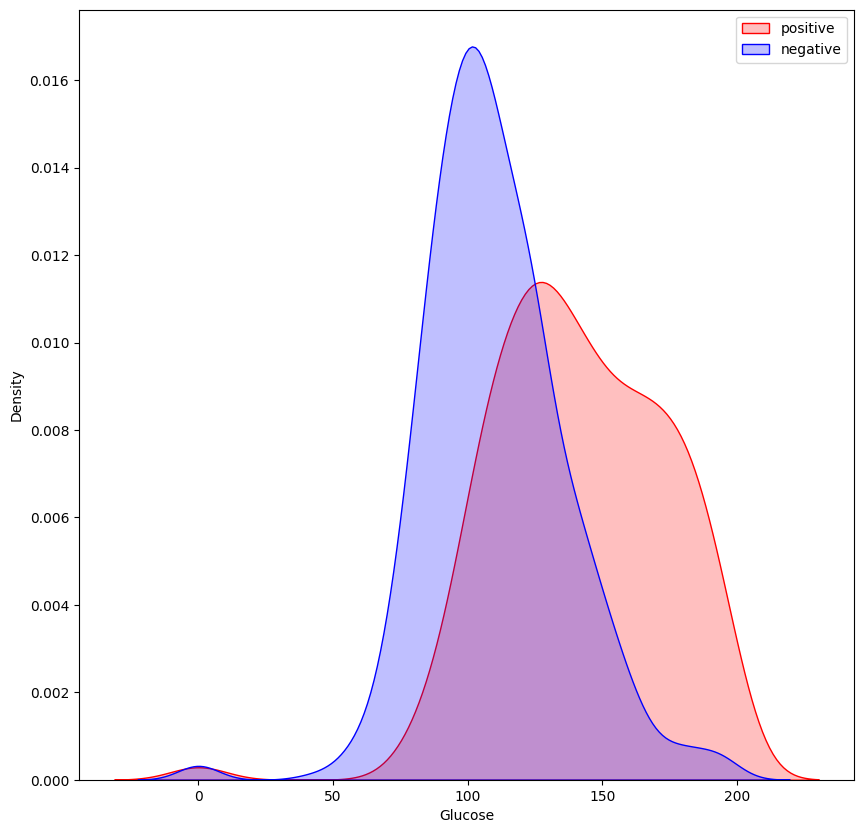

In [144]:
#Explore Glucose
plt.figure(figsize=(10,10))
#Plotting density values for Glucose
sns.kdeplot(df['Glucose'][df['Outcome']==1], color="red", fill=True, label='positive')
sns.kdeplot(df['Glucose'][df['Outcome']==0], color="blue", fill=True, label='negative')
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.legend()
plt.show()

# Insights
1. people with glucose range from 50 to 200 are negative and having highest density 0.016

2. Around 125 the people with positive are maximum density it means maximum people having positive are having Glucose 125

3. But to verify it we need at which the glucose rate is Maximum

4. Around 100 the plot is increasing and having peak value at 125


<Axes: xlabel='Outcome', ylabel='Glucose'>

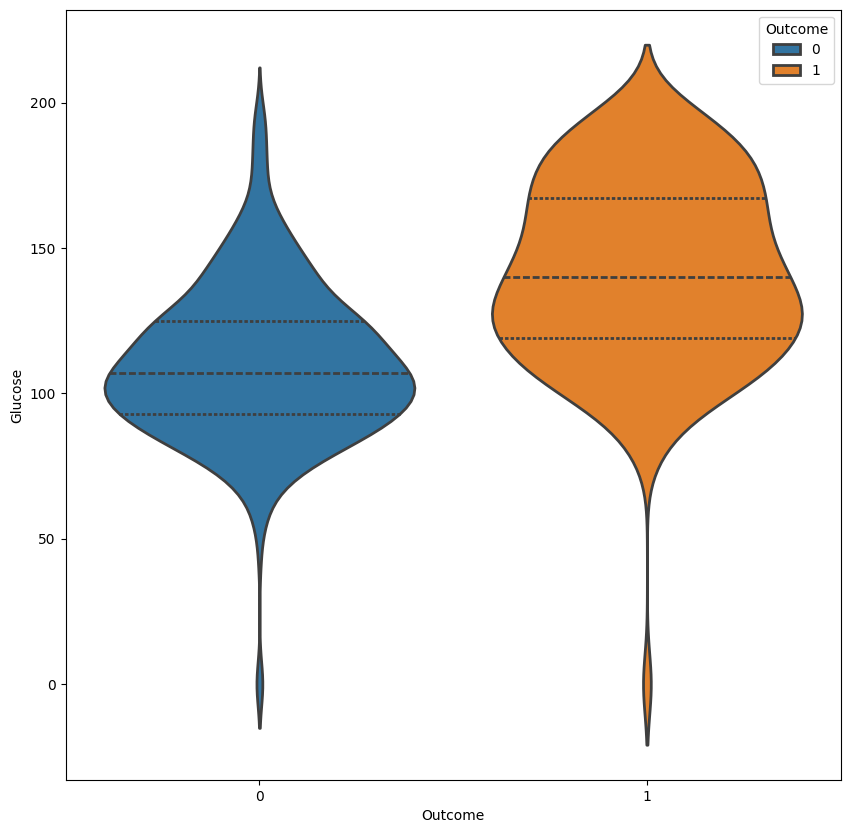

In [145]:
#Violinplot for the above
plt.figure(figsize=(10,10))
sns.violinplot(x='Outcome', y='Glucose', data=df,  linewidth=2, inner='quart', hue='Outcome')

# Insights

1. the people with negative their average glucose is around 110 from the above diagram

2. From the Previous insight we know that th peak glucose value is 125
and here it has been proven.

3. From the above diagram the minimum value of Glucose is 125 in the positive violinplot

In [146]:
# Replacing zeros with median and mean
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

In [147]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


The Reason for doing these mean and median values is for example there are some data where insulin is 0, but which is not true in medical sciences as given by this research.

***While it was previously thought that type 1 diabetes prevents the pancreas from producing insulin, recent findings show that about three-quarters of patients with the condition have some beta cells that produce insulin in response to food.***

In [148]:
# Splitting the dependent and independent variables
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [149]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [150]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [151]:
# Creating train and test data that is validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, train_size=0.8)

In [152]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29.000000,126.000000,35.200000,0.692,54
118,4,97,60,23.000000,79.799479,28.200000,0.443,22
247,0,165,90,33.000000,680.000000,52.300000,0.427,23
157,1,109,56,21.000000,135.000000,25.200000,0.833,23
468,8,120,72,20.536458,79.799479,30.000000,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.900000,0.171,63
192,7,159,66,20.536458,79.799479,30.400000,0.383,36
629,4,94,65,22.000000,79.799479,24.700000,0.148,21
559,11,85,74,20.536458,79.799479,30.100000,0.300,35


In [153]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43.000000,79.799479,42.9,1.394,22
122,2,107,74,30.000000,100.000000,33.6,0.404,23
113,4,76,62,20.536458,79.799479,34.0,0.391,25
14,5,166,72,19.000000,175.000000,25.8,0.587,51
529,0,111,65,20.536458,79.799479,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45.000000,191.000000,33.7,0.711,29
482,4,85,58,22.000000,49.000000,27.8,0.306,28
230,4,142,86,20.536458,79.799479,44.0,0.645,22
527,3,116,74,15.000000,105.000000,26.3,0.107,24


In [154]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [155]:
# As we are confused about number of neighbours we will find accuracies for various number of neighbours
train_accuracy = []
test_accuracy = []
for n in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

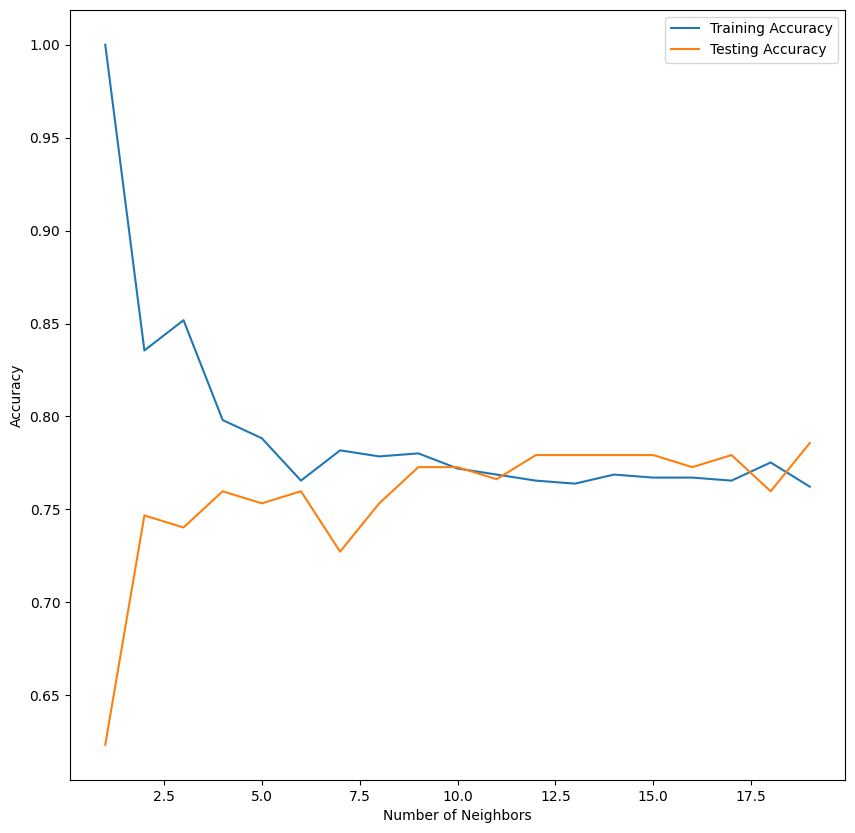

In [156]:
# Plotting for the above
plt.figure(figsize=(10,10))
plt.plot(range(1,20), train_accuracy, label='Training Accuracy')
plt.plot(range(1,20), test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Insights
1. As we can see for 1 neighbour the training accuracy is at 1.00 mean 100% accuracy

2. But where as the test accuracy is at lowest less than 60%

3. From the graph we can say that at near to from 9 to 11 neighbours we are getting train accuracy of 75-78% and test accuracy is around 80% which is very good sign.

4. more than that the train accuracy is getting decreased and test accuracy is improving but we need a model which gives good result over both.

In [157]:
# 9 Neighbours
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train), ": Training Accuracy")
print(knn.score(X_test, y_test), ": Test Accuracy")

0.7801302931596091 : Training Accuracy
0.7727272727272727 : Test Accuracy


In [158]:
# 11 Neighbours
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train), ": Training Accuracy")
print(knn.score(X_test, y_test), ": Test Accuracy")

0.7687296416938111 : Training Accuracy
0.7662337662337663 : Test Accuracy


1. From the above we can understand that for 9 neighbours it is giving of maximum 78% for train and for test it is giving an accuracy of 77% which is pretty good

2. And for 11 neighbours both are at 76.6 to 76.8 % which is quite 1-2 % less than the first one

In [159]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
acc_knn = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of knn: ",acc_knn)

Accuarcy of knn:  77.0


In [160]:
# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=0, max_depth=5)
dt1.fit(X_train, y_train)
print(dt1.score(X_train, y_train), ": Training Accuracy")
print(dt1.score(X_test, y_test), ": Test Accuracy")

0.8208469055374593 : Training Accuracy
0.7662337662337663 : Test Accuracy


In [161]:
y_pred = dt1.predict(X_test)
acc_dt = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of Decision Tree: ",acc_dt)

Accuarcy of Decision Tree:  77.0


In [162]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(random_state=0)
mlp1.fit(X_train, y_train)
print(mlp1.score(X_train, y_train), ": Training Accuracy")
print(mlp1.score(X_test, y_test), ": Test Accuracy")

0.7084690553745928 : Training Accuracy
0.6493506493506493 : Test Accuracy


In [163]:
y_pred = mlp1.predict(X_test)
acc_mlp = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of MLPClassifier: ",acc_mlp)

Accuarcy of MLPClassifier:  65.0


As we can see the accuracy is quite bad now will change some parameters

In [164]:
mlp2 = MLPClassifier(random_state=1, max_iter=300)
mlp2.fit(X_train, y_train)
print(mlp2.score(X_train, y_train), ": Training Accuracy")
print(mlp2.score(X_test, y_test), ": Test Accuracy")

0.7100977198697068 : Training Accuracy
0.6753246753246753 : Test Accuracy


In [165]:
y_pred = mlp2.predict(X_test)
acc_mlp = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of MLPClassifier: ",acc_mlp)

Accuarcy of MLPClassifier:  68.0


As we can see there is a rise in 3% of Accuracy like wise we can increase iterations or decrease it

In [166]:
# Preprocessing for Improving Accuracy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [167]:
mlp1.fit(X_train_scaled, y_train)
print(mlp1.score(X_train_scaled, y_train), ": Training Accuracy")
print(mlp1.score(X_test_scaled, y_test), ": Test Accuracy")

0.8110749185667753 : Training Accuracy
0.7987012987012987 : Test Accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [168]:
y_pred = mlp1.predict(X_test_scaled)
acc_mlp = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of MLPClassifier: ",acc_mlp)

Accuarcy of MLPClassifier:  80.0


As you can see there is a ***Lot More Increase in accuracy ***

So From Neural Networks it is Actually Helping The MLPClassifier is working great


In [169]:
# Doing Logistic regression for the data not scaled
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
lr1.fit(X_train, y_train)
print(lr1.score(X_train, y_train), ": Training Accuracy")
print(lr1.score(X_test, y_test), ": Test Accuracy")

0.7654723127035831 : Training Accuracy
0.7987012987012987 : Test Accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [170]:
y_pred = lr1.predict(X_test)
acc_lr = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of Logistic Regression: ",acc_lr)

Accuarcy of Logistic Regression:  80.0


In [171]:
# Applying for Scaled data
lr2 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
lr2.fit(X_train_scaled, y_train)
print(lr2.score(X_train_scaled, y_train), ": Training Accuracy")
print(lr2.score(X_test_scaled, y_test), ": Test Accuracy")

0.7671009771986971 : Training Accuracy
0.8181818181818182 : Test Accuracy


After Scaling the Test Accuracy has increased by 2%

In [172]:
y_pred = lr2.predict(X_test_scaled)
acc_lr = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of Logistic Regression: ",acc_lr)

Accuarcy of Logistic Regression:  82.0


In [173]:
# RandomForestClassifier for UnscaledData
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=0, max_depth=5, criterion='gini')
rf1.fit(X_train, y_train)
print(rf1.score(X_train, y_train), ": Training Accuracy")
print(rf1.score(X_test, y_test), ": Test Accuracy")

0.8322475570032574 : Training Accuracy
0.8246753246753247 : Test Accuracy


In [174]:
y_pred = rf1.predict(X_test)
acc_rf = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of Random Forest: ",acc_rf)

Accuarcy of Random Forest:  82.0


In [175]:
# RandomForestClassifier for ScaledData
rf2 = RandomForestClassifier(random_state=0, max_depth=9, criterion='entropy')
rf2.fit(X_train_scaled, y_train)
print(rf2.score(X_train_scaled, y_train), ": Training Accuracy")
print(rf2.score(X_test_scaled, y_test), ": Test Accuracy")

0.9723127035830619 : Training Accuracy
0.8246753246753247 : Test Accuracy


In [176]:
y_pred = rf2.predict(X_test_scaled)
acc_rf = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of Random Forest: ",acc_rf)

Accuarcy of Random Forest:  82.0


As you can see the The Training Accuracy Increased Rapidly
So it depends on various parameters and types of scalers.

In [184]:
# Applying Piping and Scaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.734375

In [185]:
y_pred = pipe.predict(X_test)
acc_lr = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of Logistic Regression: ",acc_lr)

Accuarcy of Logistic Regression:  73.0


In [196]:
# Pipeline for RandomForestClassifier
pipe2 = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=0, criterion='entropy'))
pipe2.fit(X_train, y_train)
pipe2.score(X_test, y_test)

0.765625

In [197]:
y_pred = pipe2.predict(X_test)
acc_rf = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of Random Forest: ",acc_rf)

Accuarcy of Random Forest:  77.0


In [198]:
# Hyperparametertuning and ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(pipe2, param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
acc_rf = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of Random Forest: ",acc_rf)

{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 50}
Accuarcy of Random Forest:  74.0


In [199]:
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga']
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
acc_lr = round(accuracy_score(y_test, y_pred), 2)*100
print("Accuarcy of Logistic Regression: ",acc_lr)

{'logisticregression__C': 0.1, 'logisticregression__solver': 'saga'}
Accuarcy of Logistic Regression:  73.0


# Conclusion

1. The Accuracy can be increased with various Models such as RandomForestClassifier, SupportVectorMachines etc.

2. First step is to clean data and check if there are outliers or any null values so that we can remove

3. Analyse the data properly so that we can know which features are dependent and indepenent.

4. Now we have to separate Data into Features Data and Target i.e Outcome into X and y

5. Split the data into train and test data and choose a perfect choice of dividing data into various percentages

6. Intialize Models and fit the train data and test it and record accuracy.

7. To improve Accuracy we can do Scalarization of Data such as Standard Scaler, MinMaxScaler etc so on.

8. Now Apply Scaled data to that model and check it's accuracy

9. To increase more and to have cleaner code we can implement Piping by which we can intialize the scaler and model into one.

10. Hyperparameter Tuning is also another method to increase Accuracy there are Search like GridSearch CV which gives best model parameters

